# Restaurant's Cuisine ratings dataset

The dataset contains information about people who visited a restaurant, their reviews based on the service, cuisine and food they received

Columns in dataset:

User ID:
User ID of customers

Area code:
Area code of customers residence

Location:
Area and the city of residence of customers

Gender:
Gender of customer

YOB:
Year when customer was born

Marital Status:
Marital status

Activity:
Customers career status whether student or professional

Budget:
Budget they may spend in the restaurant

Cuisines:
Cuisine they preferred/liked the most to have at restaurant

Alcohol:
Alcohol intake frequency

Smoker:
Smoking frequency

Food Rating:
Rating they gave to restaurant's food

Service Rating:
Rating they gave to restaurant's service

Overall Rating:
Mean rating calculated from food and service ratings

Often A S:
Often they visited restaurant or not

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/Cuisine_rating.csv')

In [3]:
df.shape

(200, 15)

In [4]:
#information about all the columns, contains null values and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


There is no null value in this dataset.

In [5]:
#listing first 5 files
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [6]:
#information about numeric columns
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


From the description itself we can understand that the values are in a good range and there is less chance of an outlier in this

In [9]:
df.groupby(['Gender','Marital Status'])['User ID'].count()

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: User ID, dtype: int64

This shows the information of marital status of males and females. 

In [25]:
#cusinies on budget
budget_cuisine = df.groupby(['Cuisines'])['Budget'].sum()

In [13]:
#Getting information about Cuisines by student and professionals
df.groupby(['Activity','Cuisines'])['User ID'].count()

Activity      Cuisines
Professional  Chinese      8
              Filipino    14
              French      16
              Indian      18
              Italian      6
              Japanese    12
              Seafood      6
Student       Chinese     16
              Filipino    20
              French      18
              Indian      14
              Italian     12
              Japanese    24
              Seafood     16
Name: User ID, dtype: int64

In [16]:
#alcohol consumption information
df.groupby(['Alcohol ','Gender'])['User ID'].count()

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [17]:
#smoking information
df.groupby(["Smoker","Gender"])["User ID"].count()

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [34]:
#Cuisines and their food rating
cuisine_rating = df.groupby(["Cuisines"])["Food Rating"].sum()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Cuisines', ylabel='Food Rating'>

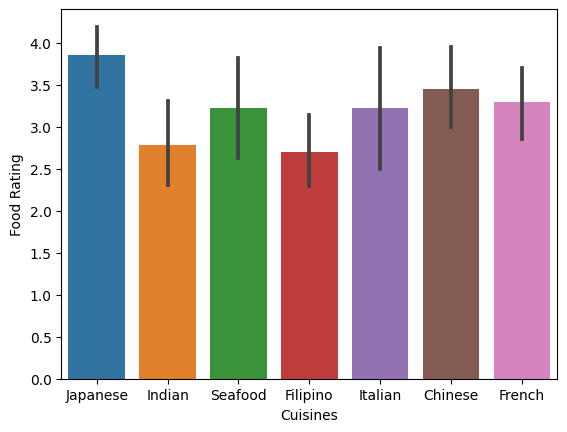

In [24]:
sns.barplot(data = df, x = 'Cuisines', y ='Food Rating') 

 Japnese food cuisine has maximum rating where as filipino has minimum food rating

In [27]:
budget_cuisine

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

<Axes: ylabel='Budget'>

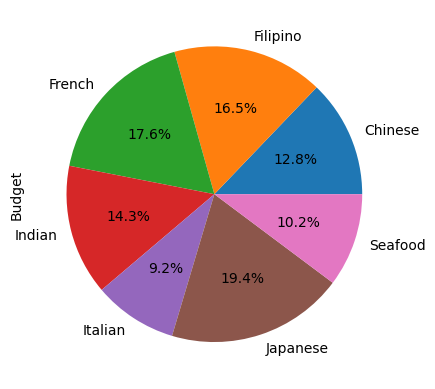

In [33]:
budget_cuisine.plot.pie(y=budget_cuisine.index, autopct='%1.1f%%')

Pie chart shows that Japanese cuisine is expensive and italian is least

<Axes: ylabel='Food Rating'>

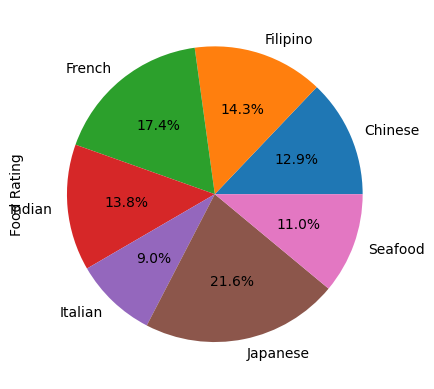

In [35]:
cuisine_rating.plot.pie(y=cuisine_rating.index, autopct='%1.1f%%')

In [ ]:
Also Japanese food got the highest rating of all cuisines